In [1]:
%matplotlib inline
import pandas as pd
from plotnine import *
import numpy as np

# Basic For Loop

In [2]:
p = 18
r = 0.1
sim_length = 20

for i in range(sim_length):
    p += r * p
    
p

121.09499908786083

# Saving Data Over Time for Plotting

In [3]:
p = 18
r = 0.1
sim_length = 20

time = []
pop = []

for i in range(sim_length + 1):
    time.append(i)
    pop.append(p)
    p += r * p
    
pop[-1]

121.09499908786083

In [4]:
df = pd.DataFrame({"time":time, "population":pop})

In [5]:
df

,time,population
0,0,18.000000
1,1,19.800000
2,2,21.780000
3,3,23.958000
4,4,26.353800
5,5,28.989180
6,6,31.888098
7,7,35.076908
8,8,38.584599
9,9,42.443058


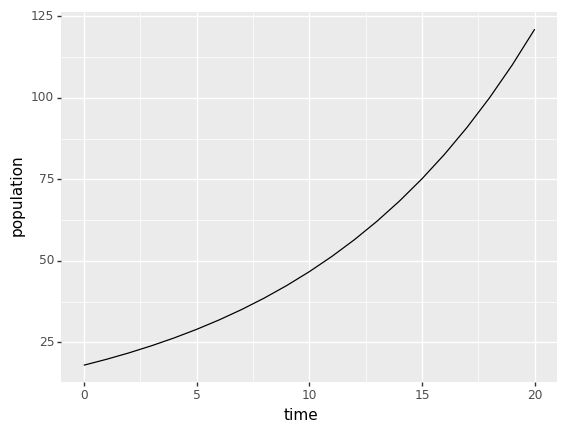

<ggplot: (8766617142655)>

In [6]:
ggplot(df, aes(x="time", y="population")) + geom_line()

# Adding dt
Now we can further subdivide the time in regular intervals

In [7]:
p = 18
r = 0.1

sim_length = 20
dt = 0.01

time = []
pop = []

num_iter = int(sim_length / dt) + 1
for i in range(num_iter):
    time.append(i * dt)
    pop.append(p)
    p += r * p * dt

# Making dt be derived from the sequence of time

In [8]:
p = 18
r = 0.1

sim_length = 20

time = np.linspace(0, sim_length, sim_length * 10)
pop = [p]

for i in range(1, len(time)):
    dt = time[i] - time[i - 1]
    pop.append(p)
    p += r * p * dt

# Extracting the differential equation into a function

In [9]:
p = 18
r = 0.1

sim_length = 20

def growth(u, dt):
    return u * r * dt

time = np.linspace(0, sim_length, sim_length * 10)
pop = [p]

for i in range(1, len(time)):
    dt = time[i] - time[i - 1]
    pop.append(p)
    p += growth(p, dt)

# Easily replace with new logistic diff eq


In [10]:
p = 18
r = 0.1
M = 50

sim_length = 60

def logistic(u, dt):
    return u * r * (1 - u / M) * dt

time = np.linspace(0, sim_length, sim_length * 10)
pop = [p]

for i in range(1, len(time)):
    dt = time[i] - time[i - 1]
    pop.append(p)
    p += logistic(p, dt)

In [11]:
df = pd.DataFrame({"time":time, "population":pop})

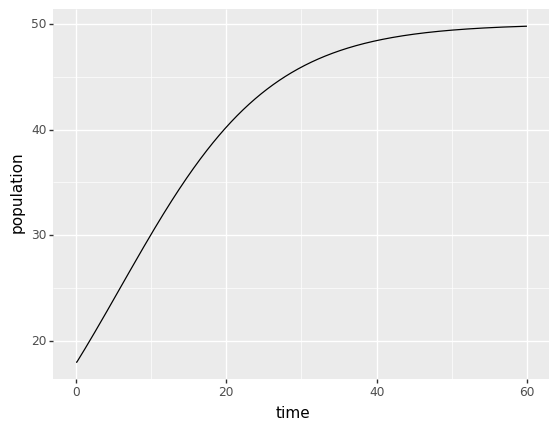

<ggplot: (8766617142571)>

In [12]:
ggplot(df, aes(x="time", y="population")) + geom_line()

# Abstract the for loop into Euler function 
euler brings in function, initial value, and time sequence


In [13]:
p = 18
r = 0.1
M = 50

sim_length = 100

def euler(func, initial, deltas):
    vals = [initial]
    for i in range(1, len(deltas)):
        dt = deltas[i] - deltas[i - 1]
        initial += func(initial, dt)
        vals.append(initial)
    return vals
    

def logistic(u, dt):
    return u * r * (1 - u / M) * dt

time = np.linspace(0, sim_length, sim_length * 10)
pop = euler(logistic, p, time)

# Abstracting for multiple variables, using cur

In [14]:
x = 10.0
y = 5.0
a = 1.5
b = 1.0
c = 3.0
d = 1.0

sim_length = 24

def euler(func, initial, deltas):
    vals = [initial]
    for i in range(1, len(deltas)):
        cur = np.array(vals[-1][:])
        dt = deltas[i] - deltas[i - 1]
        cur += func(cur, dt)
        vals.append(cur)
    return np.array(vals)
    

def predprey(u, dt):
    x, y = u
    dx = (a * x - b * x * y) * dt
    dy = (-c * y  + d * x * y) * dt
    return [dx, dy]

time = np.linspace(0, sim_length, sim_length * 3000)
pop = euler(predprey, [x, y], time)

# Our results are now in a different form, changing up the DataFrame creation

In [15]:
pop

array([[10.        ,  5.        ],
       [ 9.98833317,  5.01166683],
       [ 9.97664111,  5.02334139],
       ...,
       [ 1.05744159,  0.03795485],
       [ 1.05795694,  0.03793028],
       [ 1.05847255,  0.03790572]])

In [16]:
df = pd.DataFrame(pop, columns=["wolf", "sheep"])
df["time"] = time

In [17]:
df

,wolf,sheep,time
0,10.000000,5.000000,0.000000
1,9.988333,5.011667,0.000333
2,9.976641,5.023341,0.000667
3,9.964924,5.035024,0.001000
4,9.953182,5.046713,0.001333
...,...,...,...
71995,1.056412,0.038004,23.998667
71996,1.056926,0.037979,23.999000
71997,1.057442,0.037955,23.999333
71998,1.057957,0.037930,23.999667


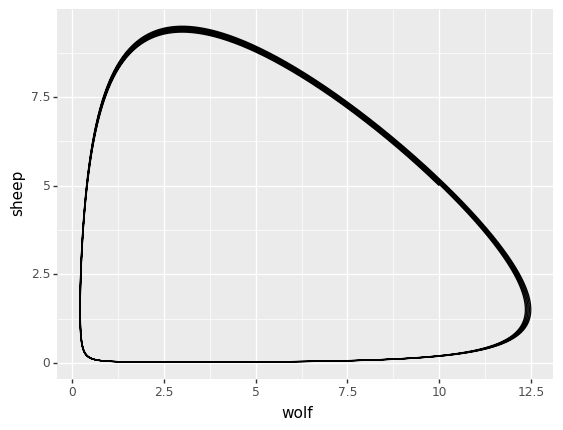

<ggplot: (8766617304839)>

In [18]:
ggplot(df, aes(x="wolf", y="sheep")) + geom_path()

# We need to melt the DataFrame to plot over time

In [19]:
dfmelt=pd.melt(df, id_vars=['time'], value_vars=["wolf", "sheep"], 
               var_name='species', value_name='population')
dfmelt

,time,species,population
0,0.000000,wolf,10.000000
1,0.000333,wolf,9.988333
2,0.000667,wolf,9.976641
3,0.001000,wolf,9.964924
4,0.001333,wolf,9.953182
...,...,...,...
143995,23.998667,sheep,0.038004
143996,23.999000,sheep,0.037979
143997,23.999333,sheep,0.037955
143998,23.999667,sheep,0.037930


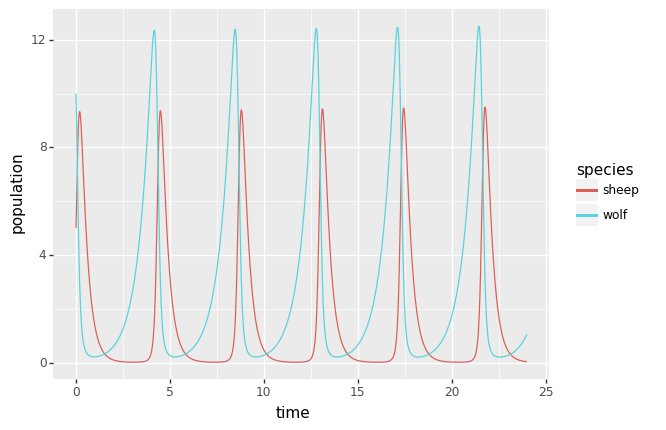

<ggplot: (8766617305064)>

In [20]:
ggplot(dfmelt, aes(x="time", y="population", color="species")) + geom_line()